# Heart Disease Prediction

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

This dataset contains 76 features, but all published experiments refer to using a subset of 14 of them. The "goal" feature refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4 (values 1,2,3,4) from absence (value 0). It is therefore a multiclass classification problem.

For our example, we will use several more features than the traditional 14.

Our focus in using this dataset will be exploring pre-processing methods more thoroughly
More details can be found at the UCI repository.

Acknowledgments
The authors of the dataset have requested that any use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

In [60]:
df = pd.read_csv("heart-disease-2.csv")
df.head()

63    male   typical anginal  145  233  50.0  1  1.1    vent  150  0  2.3  \
0  67    male      asymptomatic  160  286  40.0  0    1    vent  108  1  1.5   
1  67    male      asymptomatic  120  229  20.0  0    1    vent  129  1  2.6   
2  37    male       non-anginal  130  250   0.0  0    1  normal  187  0  3.5   
3  41  female  atypical anginal  130  204   0.0  0    1    vent  172  0  1.4   
4  56    male  atypical anginal  120  236  20.0  0    1  normal  178  0  0.8   

   downsloping  0.0       fixed  0.1  
0         flat  3.0      normal    2  
1         flat  2.0  reversable    1  
2  downsloping  0.0      normal    0  
3    upsloping  0.0      normal    0  
4    upsloping  0.0      normal    0

In [61]:
df.columns = ['age', 'sex', 'cpt', 'rbps', 'chol', 'cig_per_day', 'fbs', 'fam_hist', 'rest_ecg',
              'max_heart_rate', 'exang', 'old_peak', 'slope', 'cmj', 'defect', 'goal'
]

In [62]:
df.head()

age     sex               cpt  rbps  chol  cig_per_day  fbs  fam_hist  \
0   67    male      asymptomatic   160   286         40.0    0         1   
1   67    male      asymptomatic   120   229         20.0    0         1   
2   37    male       non-anginal   130   250          0.0    0         1   
3   41  female  atypical anginal   130   204          0.0    0         1   
4   56    male  atypical anginal   120   236         20.0    0         1   

  rest_ecg  max_heart_rate  exang  old_peak        slope  cmj      defect  \
0     vent             108      1       1.5         flat  3.0      normal   
1     vent             129      1       2.6         flat  2.0  reversable   
2   normal             187      0       3.5  downsloping  0.0      normal   
3     vent             172      0       1.4    upsloping  0.0      normal   
4   normal             178      0       0.8    upsloping  0.0      normal   

   goal  
0     2  
1     1  
2     0  
3     0  
4     0

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             302 non-null    int64  
 1   sex             302 non-null    object 
 2   cpt             302 non-null    object 
 3   rbps            302 non-null    int64  
 4   chol            302 non-null    int64  
 5   cig_per_day     297 non-null    float64
 6   fbs             302 non-null    int64  
 7   fam_hist        302 non-null    int64  
 8   rest_ecg        302 non-null    object 
 9   max_heart_rate  302 non-null    int64  
 10  exang           302 non-null    int64  
 11  old_peak        302 non-null    float64
 12  slope           302 non-null    object 
 13  cmj             298 non-null    float64
 14  defect          300 non-null    object 
 15  goal            302 non-null    int64  
dtypes: float64(3), int64(8), object(5)
memory usage: 37.9+ KB


In [64]:
df.describe(include = "all")

age   sex           cpt        rbps        chol  cig_per_day  \
count   302.000000   302           302  302.000000  302.000000   297.000000   
unique         NaN     2             4         NaN         NaN          NaN   
top            NaN  male  asymptomatic         NaN         NaN          NaN   
freq           NaN   205           144         NaN         NaN          NaN   
mean     54.410596   NaN           NaN  131.645695  246.738411    17.141414   
std       9.040163   NaN           NaN   17.612202   51.856829    19.412839   
min      29.000000   NaN           NaN   94.000000  126.000000     0.000000   
25%      48.000000   NaN           NaN  120.000000  211.000000     0.000000   
50%      55.500000   NaN           NaN  130.000000  241.500000    15.000000   
75%      61.000000   NaN           NaN  140.000000  275.000000    30.000000   
max      77.000000   NaN           NaN  200.000000  564.000000    99.000000   

               fbs    fam_hist rest_ecg  max_heart_rate       exang  \
count   302.000000  302.000000      302      302.000000  302.000000   
unique         NaN         NaN        3             NaN         NaN   
top            NaN         NaN   normal             NaN         NaN   
freq           NaN         NaN      151             NaN         NaN   
mean      0.145695    0.625828      NaN      149.605960    0.327815   
std       0.353386    0.484712      NaN       22.912959    0.470196   
min       0.000000    0.000000      NaN       71.000000    0.000000   
25%       0.000000    0.000000      NaN      133.250000    0.000000   
50%       0.000000    1.000000      NaN      153.000000    0.000000   
75%       0.000000    1.000000      NaN      166.000000    1.000000   
max       1.000000    1.000000      NaN      202.000000    1.000000   

          old_peak      slope         cmj  defect        goal  
count   302.000000        302  298.000000     300  302.000000  
unique         NaN          3         NaN       3         NaN  
top            NaN  upsloping         NaN  normal         NaN  
freq           NaN        142         NaN     166         NaN  
mean      1.035430        NaN    0.674497     NaN    0.940397  
std       1.160723        NaN    0.938202     NaN    1.229384  
min       0.000000        NaN    0.000000     NaN    0.000000  
25%       0.000000        NaN    0.000000     NaN    0.000000  
50%       0.800000        NaN    0.000000     NaN    0.000000  
75%       1.600000        NaN    1.000000     NaN    2.000000  
max       6.200000        NaN    3.000000     NaN    4.000000

In [65]:
df.isnull().sum()

age               0
sex               0
cpt               0
rbps              0
chol              0
cig_per_day       5
fbs               0
fam_hist          0
rest_ecg          0
max_heart_rate    0
exang             0
old_peak          0
slope             0
cmj               4
defect            2
goal              0
dtype: int64

In [66]:
df.duplicated().sum()

0

In [67]:
(df.isna().sum()/df.shape[0])*100

age               0.000000
sex               0.000000
cpt               0.000000
rbps              0.000000
chol              0.000000
cig_per_day       1.655629
fbs               0.000000
fam_hist          0.000000
rest_ecg          0.000000
max_heart_rate    0.000000
exang             0.000000
old_peak          0.000000
slope             0.000000
cmj               1.324503
defect            0.662252
goal              0.000000
dtype: float64

In [68]:
df.tail()

age     sex               cpt  rbps  chol  cig_per_day  fbs  fam_hist  \
297   45    male   typical anginal   110   264          0.0    0         1   
298   68    male      asymptomatic   144   193         40.0    1         1   
299   57    male      asymptomatic   130   131         50.0    0         0   
300   57  female  atypical anginal   130   236          0.0    0         0   
301   38    male       non-anginal   138   175         60.0    0         1   

    rest_ecg  max_heart_rate  exang  old_peak      slope  cmj      defect  \
297   normal             132      0       1.2       flat  0.0  reversable   
298   normal             141      0       3.4       flat  2.0  reversable   
299   normal             115      1       1.2       flat  1.0  reversable   
300     vent             174      0       0.0       flat  1.0      normal   
301   normal             173      0       0.0  upsloping  NaN      normal   

     goal  
297     1  
298     2  
299     3  
300     1  
301     0

In [69]:
df = df.dropna().reset_index(drop=True)

In [70]:
df.isna().sum()

age               0
sex               0
cpt               0
rbps              0
chol              0
cig_per_day       0
fbs               0
fam_hist          0
rest_ecg          0
max_heart_rate    0
exang             0
old_peak          0
slope             0
cmj               0
defect            0
goal              0
dtype: int64

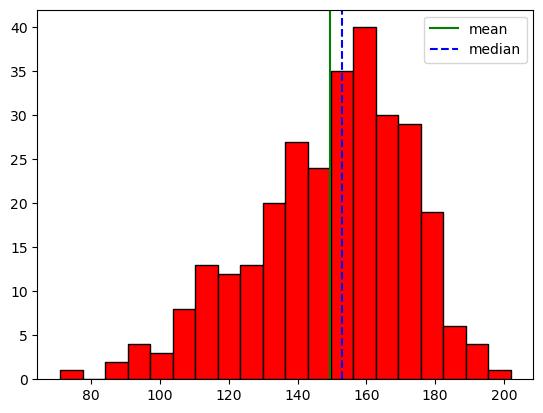

In [71]:
plt.hist(df.max_heart_rate, color = "red", edgecolor = "black", bins = 20)
plt.axvline(df.max_heart_rate.mean(), c = "green", label = "mean")
plt.axvline(df.max_heart_rate.median(), c = "blue", linestyle = "--", label = "median")
plt.legend()
plt.show()

In [72]:
df.max_heart_rate.mode()[0]

162

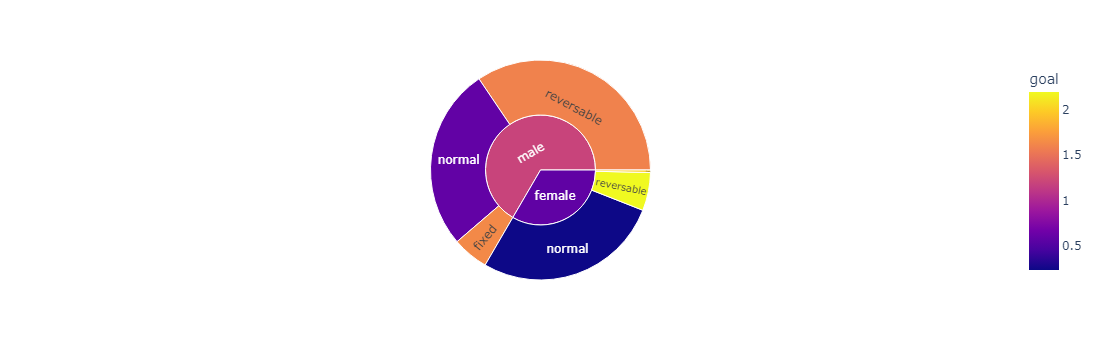

In [73]:
import plotly.express as px

fig = px.sunburst(df,
                  path=['sex','defect'],
                  values='age' , color='goal')

fig.show()

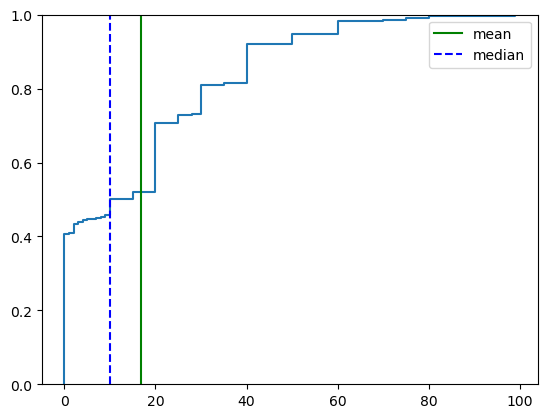

In [74]:
plt.ecdf(df.cig_per_day)
plt.axvline(df.cig_per_day.mean(), c = "green", label = "mean")
plt.axvline(df.cig_per_day.median(), c = "blue", linestyle = "--", label = "median")
plt.legend()
plt.show()

<Axes: xlabel='cpt', ylabel='count'>

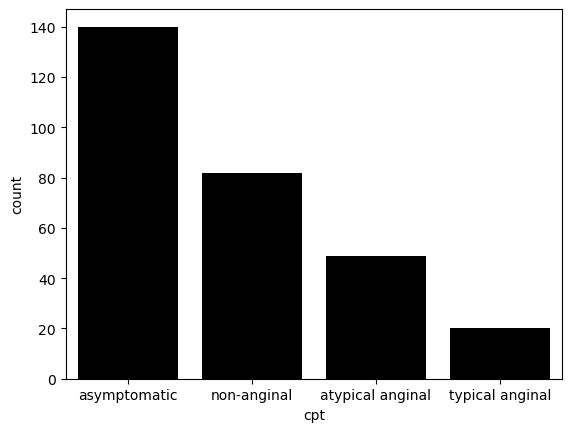

In [75]:
sns.countplot(data=df, x="cpt",color="black")

<Axes: xlabel='fam_hist', ylabel='age'>

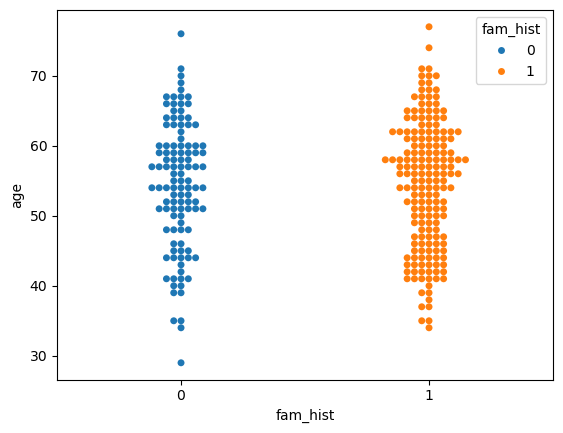

In [76]:
sns.swarmplot(data=df, x="fam_hist",y="age", hue="fam_hist")

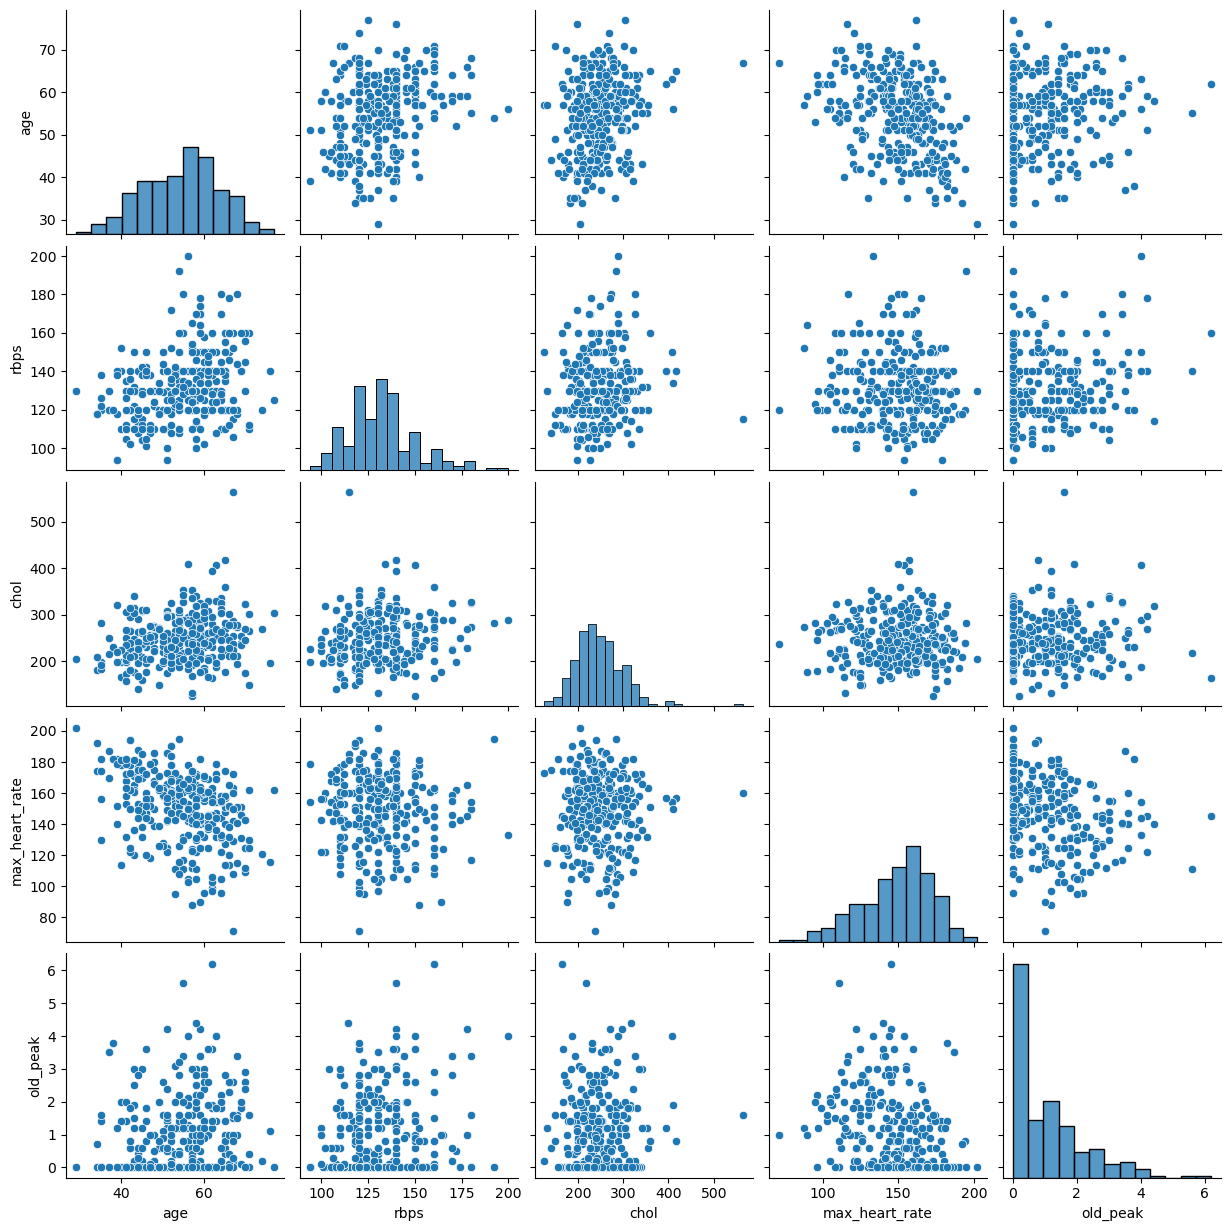

In [77]:
columns_to_plot = ['age' ,'rbps', 'chol', 'max_heart_rate', 'old_peak' ]
sns.pairplot(df[columns_to_plot])
plt.show()

#### Perform one-hot encoding or label encoding for the categorical variables

In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
df.head()

age  sex               cpt  rbps  chol  cig_per_day  fbs  fam_hist  \
0   67    1      asymptomatic   160   286         40.0    0         1   
1   67    1      asymptomatic   120   229         20.0    0         1   
2   37    1       non-anginal   130   250          0.0    0         1   
3   41    0  atypical anginal   130   204          0.0    0         1   
4   56    1  atypical anginal   120   236         20.0    0         1   

  rest_ecg  max_heart_rate  exang  old_peak        slope  cmj      defect  \
0     vent             108      1       1.5         flat  3.0      normal   
1     vent             129      1       2.6         flat  2.0  reversable   
2   normal             187      0       3.5  downsloping  0.0      normal   
3     vent             172      0       1.4    upsloping  0.0      normal   
4   normal             178      0       0.8    upsloping  0.0      normal   

   goal  
0     2  
1     1  
2     0  
3     0  
4     0

In [79]:
df['cpt'] = le.fit_transform(df['cpt'])
df.head()

age  sex  cpt  rbps  chol  cig_per_day  fbs  fam_hist rest_ecg  \
0   67    1    0   160   286         40.0    0         1     vent   
1   67    1    0   120   229         20.0    0         1     vent   
2   37    1    2   130   250          0.0    0         1   normal   
3   41    0    1   130   204          0.0    0         1     vent   
4   56    1    1   120   236         20.0    0         1   normal   

   max_heart_rate  exang  old_peak        slope  cmj      defect  goal  
0             108      1       1.5         flat  3.0      normal     2  
1             129      1       2.6         flat  2.0  reversable     1  
2             187      0       3.5  downsloping  0.0      normal     0  
3             172      0       1.4    upsloping  0.0      normal     0  
4             178      0       0.8    upsloping  0.0      normal     0

In [80]:
df['rest_ecg'] = le.fit_transform(df['rest_ecg'])
df['slope'] = le.fit_transform(df['slope'])
df['defect'] = le.fit_transform(df['defect'])
df.head(10)

age  sex  cpt  rbps  chol  cig_per_day  fbs  fam_hist  rest_ecg  \
0   67    1    0   160   286         40.0    0         1         2   
1   67    1    0   120   229         20.0    0         1         2   
2   37    1    2   130   250          0.0    0         1         0   
3   41    0    1   130   204          0.0    0         1         2   
4   56    1    1   120   236         20.0    0         1         0   
5   62    0    0   140   268          0.0    0         1         2   
6   57    0    0   120   354          0.0    0         1         0   
7   63    1    0   130   254          0.0    0         0         2   
8   53    1    0   140   203         20.0    1         1         2   
9   57    1    0   140   192         75.0    0         0         0   

   max_heart_rate  exang  old_peak  slope  cmj  defect  goal  
0             108      1       1.5      1  3.0       1     2  
1             129      1       2.6      1  2.0       2     1  
2             187      0       3.5      0  0.0       1     0  
3             172      0       1.4      2  0.0       1     0  
4             178      0       0.8      2  0.0       1     0  
5             160      0       3.6      0  2.0       1     3  
6             163      1       0.6      2  0.0       1     0  
7             147      0       1.4      1  1.0       2     2  
8             155      1       3.1      0  0.0       2     1  
9             148      0       0.4      1  0.0       0     0

In [81]:
df.head()

age  sex  cpt  rbps  chol  cig_per_day  fbs  fam_hist  rest_ecg  \
0   67    1    0   160   286         40.0    0         1         2   
1   67    1    0   120   229         20.0    0         1         2   
2   37    1    2   130   250          0.0    0         1         0   
3   41    0    1   130   204          0.0    0         1         2   
4   56    1    1   120   236         20.0    0         1         0   

   max_heart_rate  exang  old_peak  slope  cmj  defect  goal  
0             108      1       1.5      1  3.0       1     2  
1             129      1       2.6      1  2.0       2     1  
2             187      0       3.5      0  0.0       1     0  
3             172      0       1.4      2  0.0       1     0  
4             178      0       0.8      2  0.0       1     0

In [82]:
df.isna().sum()

age               0
sex               0
cpt               0
rbps              0
chol              0
cig_per_day       0
fbs               0
fam_hist          0
rest_ecg          0
max_heart_rate    0
exang             0
old_peak          0
slope             0
cmj               0
defect            0
goal              0
dtype: int64

In [83]:
df = df.dropna().reset_index(drop=True)


In [84]:
df.isna().sum()

age               0
sex               0
cpt               0
rbps              0
chol              0
cig_per_day       0
fbs               0
fam_hist          0
rest_ecg          0
max_heart_rate    0
exang             0
old_peak          0
slope             0
cmj               0
defect            0
goal              0
dtype: int64

#### Now we fit in the models to classify and evaluate

We will try to fit the Logistic Regression without splitting the data

In [85]:
X = df.drop('goal', axis=1)
y = df['goal']

In [86]:
y.shape

(291,)

In [87]:
X.shape

(291, 15)

In [88]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression(max_iter=100000)

# Fit the model
logreg.fit(X, y)

C:\Users\kalra\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=100000)

In [89]:
intercept = logreg.intercept_

# the coeff, it returns array with one spot for each feature
coefficient = logreg.coef_[0]

print(intercept)
print(coefficient)

[ 3.47157646  0.25995194 -0.77498774  5.23469804 -8.19123869]
[ 0.00987776 -1.22724385  0.70064183 -0.02199656 -0.00249826  0.00504861
  0.15026422 -0.03752607 -0.21260348  0.02073051 -0.60096912 -0.4707105
  0.64705849 -1.10863529 -0.8599215 ]


In [90]:
X.shape

(291, 15)

In [91]:
y.shape

(291,)

In [92]:
# # line of best fit
# y_model = intercept + X.flatten()*coefficient

# # plot it in scatter
# plt.figure()
# plt.scatter(X, y, color='blue')  # plot the data
# plt.plot(X, y_model, color='green', linewidth=3)  # plot the line of best fit
# plt.xlabel('Median income on the block')
# plt.ylabel('House price')
# plt.show()

In [93]:
model_prediction = logreg.predict(X)

In [94]:
logreg.score(X,y)

0.7010309278350515

Very bad score, we will check on other classification models

### Logistic Regression

In [95]:
# splitting the sets into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting the linear model
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

C:\Users\kalra\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [96]:
# Evaluate its classification accuracy (Just on the training set for now)
print(f"Train set accuracy: {LR_model.score(x_train, y_train)}")

Train set accuracy: 0.6336206896551724


### Decision Tree Model

In [97]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the decision stump and fit the model
DT_model = DecisionTreeClassifier(max_depth=1)
DT_model.fit(x_train, y_train);

In [98]:
# Evaluate its classification accuracy (Just on the training set for now)
print(f"DT training set accuracy: {DT_model.score(x_train, y_train)}")

DT training set accuracy: 0.5560344827586207


### Random Forest Model

In [99]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=50 )
random_forest_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [100]:
print(f"Random Forest: {random_forest_model.score(x_train, y_train)}")

Random Forest: 1.0


In [101]:
print(f"Random Forest: {random_forest_model.score(x_test, y_test)}")

Random Forest: 0.6271186440677966


### Gradient Boosting Model

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

In [103]:
# Instantiate the model
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

# Fit the model
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [106]:
print(f"Gradient Boost: {gbc.score(x_test, y_test)}")

Gradient Boost: 0.5254237288135594


In [107]:
print(f"Gradient Boost: {gbc.score(x_train, y_train)}")

Gradient Boost: 0.8836206896551724


Seems like we have a problem of overfitting. To solve this we must resolve to Regularization. We will be looking towards the imbalances int the data and the target as well. Further we will perform more models

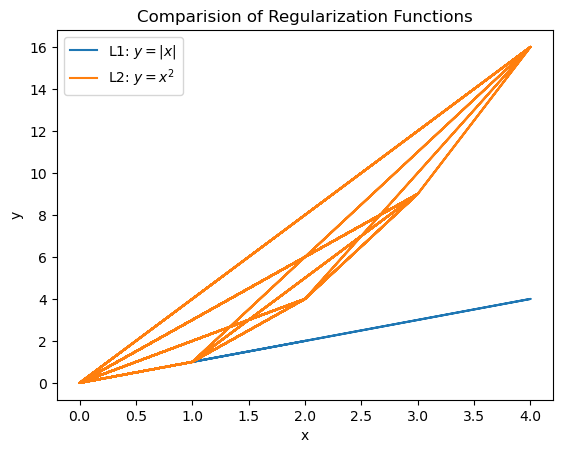

In [110]:
# Data points for creating the lines in our visual.
x = df['goal']

# Plot x^2 and abs(x) on the same visual
plt.plot()
plt.plot(x, np.abs(x), label="L1: $y = |x|$")
plt.plot(x, np.power(x, 2), label="L2: $y = x^2$")
plt.title("Comparision of Regularization Functions")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Light GBM Classifier Model

In [108]:
## need to run conda commands for their installation

# import lightgbm as lgb
# import xgboost

# # Initialize the LGBM model
# light_gbm = LGBMClassifier()

# # Fit the model
# light_gbm.fit(x_train, y_train)